# Air Quality Benefits of Emissions Testing Capstone: Data Analysis

## ----Project Context (Re-Stated from Part I) ----

As part of a capstone project my team and I were tasked with using data to inform the Pennsylvania legistlature's decision on whether to continue vehicle emission testing and which tests to use. 

The data at our disposal consisted of emissions test results from Colorado over the span of 2010-2016.

With the provided data, the team sought to investigate the following questions as the overall project goal:

- How can the emissions inspection results/data inform us about actual vehicle emissions over time?
- How does a particular model year’s emissions change over time?
- What amount of emissions are we preventing from entering the environment by testing?

The above questions would inform our recommendations to the state legistlative bodies.

### Summary of Results

#### --- Question 1: How can the emissions inspection results/data inform us about actual vehicle emissions over time? --

#### --- How does a particular model year’s emissions change over time?

#### --- What amount of emissions are we preventing from entering the environment by testing?

## ----Emissions Standards Context----

Emissions standards in the United States began after the passage of the 1970 Clean Air Act (CAA). The CAA defined the US Environmental Protection Agency's (EPA) role in protecting air quality and the ozone layer. To protect air quality, the CAA defined initial vehicle emissions limits for a variety of pollutants including Carbon Monoxide (CO), hydrocarbons (HC), and Nitrogen Oxides (NOx).

The first set of emissions standards, now termed Tier 0 standards, took effect in 1975. In 1979 and 1981, Congress tightened these standards even further and in 1990 a formal set of new emissions limits was defined; these standards, implemented starting in 1994, were deemed Tier 1 standards.

Since that time, the emissions standards have been tighened several times. In 2000, Tier 2 standards were defined and were implemented starting in 2004. In 2014, Tier 3 standards were defined and are being phased in between 2017 and 2025.

Most vehicles on the road today are held to either Tier 3 or Tier 2 standards, though cars model year 2003 and older are held to Tier 1 standards.

According to the EPA, emissions standards have led to significant decreases in vehicle emissions including up to a 98% reduction in NOx emissions in light duty vehicles on average.

More information about emissions standards can be found <a href="https://www.epa.gov/greenvehicles/light-duty-vehicle-emissions#history">here<a/>.
   

## ----Data Context----

Before starting analysis to answer the team's main questions, I was tasked with creating clean data sets from the original Colorado data. The clean data sets would include only relevant columns, and take out outliers or discrepancies found in the data.

The original datasets the team used were from Colorado emissions testing results. Data from 2010-2016 was available, and each testing year's data held 500,000 - 1,000,000 rows and 250+ columns. Each row included data from a single vehicle inspection including information about the vehicle such as make/model/year/engine data, as well as test and inspection results.

In Colorado, generally speaking, two emissions tests were run on vehicles:

1. An OBD test. This test accesses a car's diagnostic center, and checks the status of the emissions system and key engine components. This helps identify conditions that waste fuel and shorten engine life, such as a loose gas cap.

3. An IM240 test. This test puts a vehicle on a dynamometer treadmill and simulates different driving conditions. A sensor put at the tailpipe during this test measures actual emissions of carbon monoxide (CO), hydrocarbons (HC), and nitrogen oxides (NOx) from the vehicle. These emissions are compared against applicable EPA thresholds to determine the overall result.

The above tests were conducted according to Colorado's testing regimen. For light duty vehicles, the following rules defined testing requirements:

- Vehicles within their first 7 model years are exempt from testing
- Vehicles Model Year 1982 and newer must be inspected every other year
- Vehicles Model Year 1981 and older and diesel Vehicles Model Year 2003 and older must be inspected every year

### Data Dictionary

Below is a list of column names in this dataset, and a short description of their meanings:
- V_VIN: Vehicle VIN
- V_DATE: Inspection Date
- V_MAKE: Vehicle Make
- V_MODEL: Vehicle Model
- V_VEH_YEAR: Vehicle Year
- V_ODOMETER: Vehicle odometer reading
- V_CO: Carbon monoxide emissions reading
- V_HC: Hydrocarbon emissions reading
- V_NOX: NOx emissions reading
- V_CO_STD: EPA CO maximum allowable emissions limit
- V_HC_STD: EPA HC maximum allowable emissions limit
- V_NOX_STD: EPA NOx maxium allowable emissions limit
- V_OBD_RES: OBD test result
- V_EM_RES: IM240 test result
- V_RESULT: Overall inspection result. If a vehicle fails its OBD or IM240 or other inspection aspects, the entire inspection is a fail
- V_TRANS: Vehicle transmission type
- V_CYLINDERS: Number of cylinders the car's engine has
- V_DISP: Engine size (Liters)
- V_DRIVE: Vehicle drive type, eg all wheel drive

### Data Privacy Note
Please note that, for privacy reasons, the datasets originally used are no longer published for use.

### Import Python Libraries

In [3]:
#analysis and viz imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets


In [ ]:
#load original datasets

Data_2010_IM240_clean = pd.read_csv("./Data_2010_IM240_clean.csv")
Data_2011_IM240_clean = pd.read_csv("./Data_2011_IM240_clean.csv")
Data_2012_IM240_clean = pd.read_csv("./Data_2012_IM240_clean.csv")
Data_2013_IM240_clean = pd.read_csv("./Data_2013_IM240_clean.csv")
Data_2014_IM240_clean = pd.read_csv("./Data_2014_IM240_clean.csv")
Data_2015_IM240_clean = pd.read_csv("./Data_2015_IM240_clean.csv")
Data_2016_IM240_clean = pd.read_csv("./Data_2016_IM240_clean.csv")

Data_2010_OBD_clean = pd.read_csv("./Data_2010_OBD_clean.csv")
Data_2011_OBD_clean = pd.read_csv("./Data_2011_OBD_clean.csv")
Data_2012_OBD_clean = pd.read_csv("./Data_2012_OBD_clean.csv")
Data_2013_OBD_clean = pd.read_csv("./Data_2013_OBD_clean.csv")
Data_2014_OBD_clean = pd.read_csv("./Data_2014_OBD_clean.csv")
Data_2015_OBD_clean = pd.read_csv("./Data_2015_OBD_clean.csv")
Data_2016_OBD_clean = pd.read_csv("./Data_2016_OBD_clean.csv")

Data_OBD_and_IM240_clean_2010 = pd.read_csv("./OBD_and_IM240_clean_2010_df.csv")
Data_OBD_and_IM240_clean_2011 = pd.read_csv("./OBD_and_IM240_clean_2011_df.csv")
Data_OBD_and_IM240_clean_2013 = pd.read_csv("./OBD_and_IM240_clean_2013_df.csv")
Data_OBD_and_IM240_clean_2014 = pd.read_csv("./OBD_and_IM240_clean_2014_df.csv")
Data_OBD_and_IM240_clean_2015 = pd.read_csv("./OBD_and_IM240_clean_2015_df.csv")
Data_OBD_and_IM240_clean_2016 = pd.read_csv("./OBD_and_IM240_clean_2016_df.csv")

## ---- Analysis Part I: Emission Changes Over Time----

The first part of my analysis focused on how vehicle emissions changed over time. I approached this in two ways.

First, I analyzed the passing rate of vehicles by model year for each testing year in the data set. I was looking to see whether there appeared to be an improvement in passing rate year over year by model year, and whether there was a trend in passing rate across different model years.

### ----Pass Rate By Model Year----

First, I analyzed the passing rates by model year.

I used the cleaned OBD data prepared in the data cleaning process, and combined each testing year's data into one dataframe.

In [13]:
def pass_rate_by_model_year(df,year,test,metric):
    df = df[["V_VEH_YEAR", metric]].groupby(by="V_VEH_YEAR", axis=0).agg({metric: ["count","sum"]})
    df.columns=df.columns.droplevel(0)
    df.rename(columns={"count": "Model_year_"+test+"_tests_conducted", "sum":"Model_year_"+test+"_passed_tests"}, inplace=True)
    df["Model_Year_"+test+"_Pass_Rate"] = 100*df["Model_year_"+test+"_passed_tests"]/df["Model_year_"+test+"_tests_conducted"]
    df["testing_year"]=year
    return df

In [41]:
# load passing rate data from Part I

pass_rate_by_model_year_OBD_df_2010=pass_rate_by_model_year(Data_2010_OBD_clean,2010,"OBD","V_OBD_RES")
pass_rate_by_model_year_OBD_df_2011=pass_rate_by_model_year(Data_2011_OBD_clean,2011,"OBD","V_OBD_RES")
pass_rate_by_model_year_OBD_df_2012=pass_rate_by_model_year(Data_2012_OBD_clean,2012,"OBD","V_OBD_RES")
pass_rate_by_model_year_OBD_df_2013=pass_rate_by_model_year(Data_2013_OBD_clean,2013,"OBD","V_OBD_RES")
pass_rate_by_model_year_OBD_df_2014=pass_rate_by_model_year(Data_2014_OBD_clean,2014,"OBD","V_OBD_RES")
pass_rate_by_model_year_OBD_df_2015=pass_rate_by_model_year(Data_2015_OBD_clean,2015,"OBD","V_OBD_RES")
pass_rate_by_model_year_OBD_df_2016=pass_rate_by_model_year(Data_2016_OBD_clean,2016,"OBD","V_OBD_RES")

pass_rate_by_model_year_IM240_df_2010=pass_rate_by_model_year(Data_2010_IM240_clean,2010,"IM240","V_EM_RES")
pass_rate_by_model_year_IM240_df_2011=pass_rate_by_model_year(Data_2011_IM240_clean,2011,"IM240","V_EM_RES")
pass_rate_by_model_year_IM240_df_2012=pass_rate_by_model_year(Data_2012_IM240_clean,2012,"IM240","V_EM_RES")
pass_rate_by_model_year_IM240_df_2013=pass_rate_by_model_year(Data_2013_IM240_clean,2013,"IM240","V_EM_RES")
pass_rate_by_model_year_IM240_df_2014=pass_rate_by_model_year(Data_2014_IM240_clean,2014,"IM240","V_EM_RES")
pass_rate_by_model_year_IM240_df_2015=pass_rate_by_model_year(Data_2015_IM240_clean,2015,"IM240","V_EM_RES")
pass_rate_by_model_year_IM240_df_2016=pass_rate_by_model_year(Data_2016_IM240_clean,2016,"IM240","V_EM_RES")

In [42]:
# create an array with all dfs so they can be combined into one for analysis
pass_rate_by_model_year_passed_obd_only_df = [pass_rate_by_model_year_OBD_df_2010,pass_rate_by_model_year_OBD_df_2011,pass_rate_by_model_year_OBD_df_2012,pass_rate_by_model_year_OBD_df_2013,pass_rate_by_model_year_OBD_df_2014,pass_rate_by_model_year_OBD_df_2015,pass_rate_by_model_year_OBD_df_2016]

In [43]:
# combine above dfs into one
pass_rate_by_model_year_passed_obd_only_df=pd.concat(pass_rate_by_model_year_passed_obd_only_df)

In [44]:
pass_rate_by_model_year_passed_IM240_only_df = [pass_rate_by_model_year_IM240_df_2010,pass_rate_by_model_year_IM240_df_2011,pass_rate_by_model_year_IM240_df_2012,pass_rate_by_model_year_IM240_df_2013,pass_rate_by_model_year_IM240_df_2014,pass_rate_by_model_year_IM240_df_2015,pass_rate_by_model_year_IM240_df_2016]
pass_rate_by_model_year_passed_IM240_only_df=pd.concat(pass_rate_by_model_year_passed_IM240_only_df)

After combining the dataframes, I created a line chart to visually inspect what percent of vehicles passed the OBD test.

Text(0.5, 1.0, 'IM240 Test Passing Rate vs Model Year, by Testing Year')

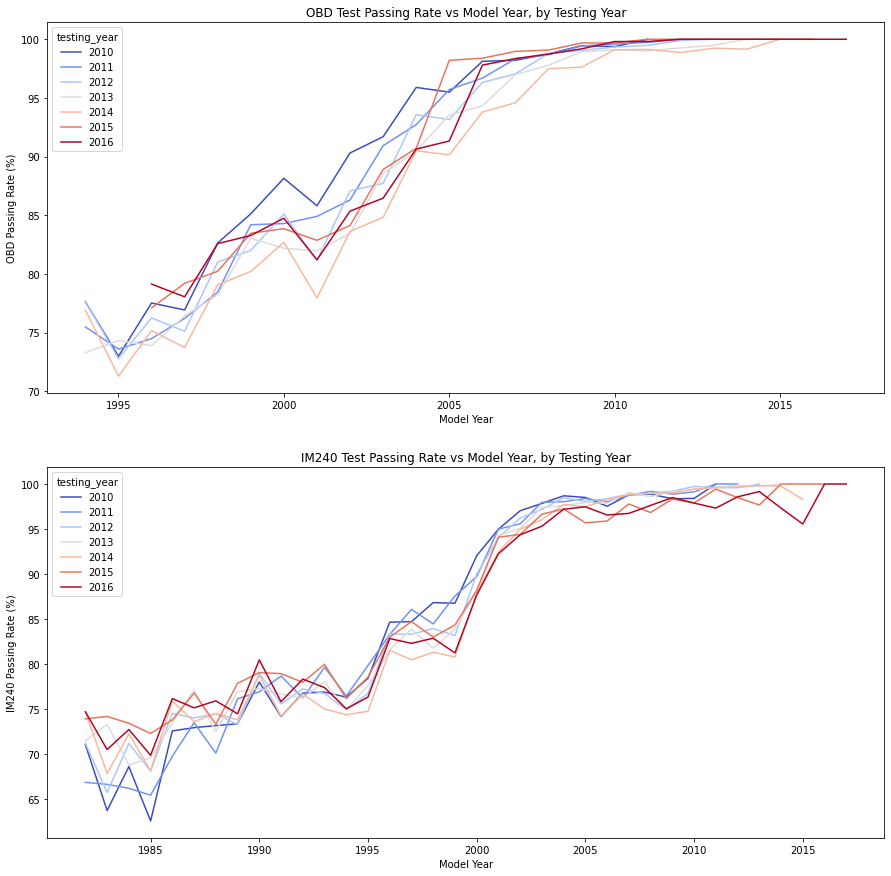

In [45]:
fig, ax = plt.subplots(2,1,figsize=(15, 15), facecolor="white")

sns.lineplot(data=pass_rate_by_model_year_passed_obd_only_df, x='V_VEH_YEAR', y='Model_Year_OBD_Pass_Rate', hue="testing_year", palette="coolwarm",ax=ax[0])
ax[0].set_xlabel("Model Year")
ax[0].set_ylabel("OBD Passing Rate (%)")
ax[0].set_title("OBD Test Passing Rate vs Model Year, by Testing Year")
# plt.savefig('V_VEH_YEAR_vs_Model_Year_OBD_Pass.png')

sns.lineplot(data=pass_rate_by_model_year_passed_IM240_only_df, x='V_VEH_YEAR', y='Model_Year_IM240_Pass_Rate', hue="testing_year", palette="coolwarm",ax=ax[1])
ax[1].set_xlabel("Model Year")
ax[1].set_ylabel("IM240 Passing Rate (%)")
ax[1].set_title("IM240 Test Passing Rate vs Model Year, by Testing Year")


After initial inspection of the above plots, the team saw several general trends:

Firstly, vehicles with older model years generally had lower passing rates than vehicles with newer model years. This made sense for several reasons. Firstly, since the OBD test checks for engine inefficiencies and breakdowns, it was plausible to see that older vehicles with older equipment had more "broken" components. Secondly, since older vehicles were created with different pollution requirements they are less likely to meet the most current EPA standards.

Secondly, for OBD results the team noticed that between testing years 2010-2016, the passing rate trends decreased year over year for all model years up to model year 2005. The team believes this trend was the result of engine components breaking down over time; as more vehicles from a particular model year were eligible for testing as time went on, more were brought in and had failing results.

For model years newer than 2005, the 2015 and 2016 passing rates was higher than the other testing year rates. The team was not certain why this occurred, but speculated that it was a combination of the following:
- Since these cars were newer, their engine components may not have been as damaged as older vehicles
- Newer vehicles didn't require testing in Colorado until they were 7 years old. As a result, OBD tests could have been performed "just to check the vehicle" and failing results may not have been recorded in the database

Finally, for IM240 results model years and model years up to 1994 testing results appeared to improve year over year. Thereafter for model years after 1994 testing results began to decline year over year. This might be a result of the various EPA emissions standards. Tier 1 standards were put in effect in 1994, so vehicles older than that would be more likely to fail current emissions tests. Upon a test failure, owners would have to improve their vehicles and when re-tested the next year the overall fleet would have a higher passing average. For newer vehicles it is possible that, as for OBD trends, newer vehicles were tested despite not being required to within their first 7 years. If these vehicles failed, they would not necessarily need to be fixed until mandated. Though there could be other explanations, this was the team's best intuition on this pattern.

### ----Percent of Cars Passing Both / One Test----

For the second part of this analysis, I looked at what percent of cars passed both tests vs exactly one test. If many cars are passing one test but failing the other, this could lead to cars on the road that:
1. Have inefficient engine components but pass the emissions test (pass IM240 test, but wouldn't pass an OBD test)
2. Have working engine components but are emitting more than EPA standards allow (pass OBD test, but wouldn't pass IM240)

If many cars meet one of the above scenarios, that would mean that if the PA legislature chose to implement one test rather than both there could be cars on the road with inefficient engine components or high emissions.

First I will load in the data for this portion of analysis.

In [5]:
#load data

pass_rate_by_model_year_both_pass_df_2010=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2010,2010,"both_tests")
pass_rate_by_model_year_both_pass_df_2011=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2011,2011,"both_tests")
pass_rate_by_model_year_both_pass_df_2013=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2013,2013,"both_tests")
pass_rate_by_model_year_both_pass_df_2014=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2014,2014,"both_tests")
pass_rate_by_model_year_both_pass_df_2015=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2015,2015,"both_tests")
pass_rate_by_model_year_both_pass_df_2016=pass_rate_by_model_year_both_tests(Data_OBD_and_IM240_clean_2016,2016,"both_tests")

I will then combine the above datasets so they can be plotted more easily. I then generate a linechart to show this data.

In [248]:
pass_rate_by_model_year_passed_both_tests_df = [pass_rate_by_model_year_both_pass_df_2010,pass_rate_by_model_year_both_pass_df_2011,pass_rate_by_model_year_both_pass_df_2013,pass_rate_by_model_year_both_pass_df_2014,pass_rate_by_model_year_both_pass_df_2015,pass_rate_by_model_year_both_pass_df_2016]
pass_rate_by_model_year_passed_both_tests_df=pd.concat(pass_rate_by_model_year_passed_both_tests_df)

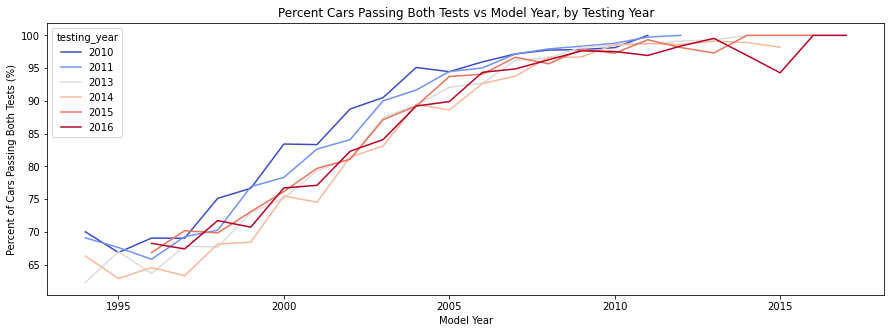

In [249]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=pass_rate_by_model_year_passed_both_tests_df, x='V_VEH_YEAR', y='Model_Year_both_tests_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("Percent of Cars Passing Both Tests (%)")
plt.title("Percent Cars Passing Both Tests vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_both_Pass.png')

In the above chart, I saw a few trends.

Firstly, passing rate of both tests generally increased in newer testing years. This might indicate that more cars are getting proper maintenance as time goes on so that their engine and emissions performance improves.

Secondly, newer model years had significantly higher rates of passing both tests than older model years. This likely reflects newer vehicles being designed to meet new regulations and standards.

To complete this portion of analysis, I plotted out the percent of vehicles passing exactly one of the required inspection tests. 

In [189]:
def pass_rate_by_model_year_exactly_one_test(df,year,test):
    df["one_test_passed"]= (df["V_OBD_RES"]+df["V_EM_RES"]==1).astype(int)
    df = df[["V_VEH_YEAR", "one_test_passed"]].groupby(by="V_VEH_YEAR", axis=0).agg({"one_test_passed": ["count","sum"]})
    df.columns=df.columns.droplevel(0)
    df.rename(columns={"count": "Model_year_"+test+"_tests_conducted", "sum":"Model_year_"+test+"_passed_tests"}, inplace=True)
    df["Model_Year_"+test+"_Pass_Rate"] = 100*df["Model_year_"+test+"_passed_tests"]/df["Model_year_"+test+"_tests_conducted"]
    df["testing_year"]=year
    return df

In [6]:
# pass_rate_by_model_year_exactly_one_pass_df_2010=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2010,2010,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2011=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2011,2011,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2013=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2013,2013,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2014=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2014,2014,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2015=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2015,2015,"both_tests")
# pass_rate_by_model_year_exactly_one_pass_df_2016=pass_rate_by_model_year_exactly_one_test(Data_OBD_and_IM240_clean_2016,2016,"both_tests")

In [ ]:
both_clean_data_frames_exactly_one_test_passed = [pass_rate_by_model_year_exactly_one_test,pass_rate_by_model_year_one_pass_df_2011,pass_rate_by_model_year_one_pass_df_2013,pass_rate_by_model_year_one_pass_df_2014,pass_rate_by_model_year_one_pass_df_2015,pass_rate_by_model_year_one_pass_df_2016]
both_clean_data_frames_exactly_one_test_passed=pd.concat(both_clean_data_frames_one_test_passed)

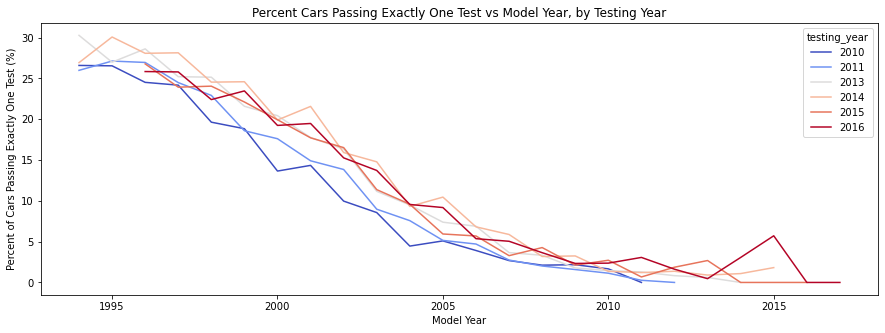

In [192]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor="white")
sns.lineplot(data=both_clean_data_frames_one_test_passed, x='V_VEH_YEAR', y='Model_Year_both_tests_Pass_Rate', hue="testing_year", palette="coolwarm")
plt.xlabel("Model Year")
plt.ylabel("Percent of Cars Passing Exactly One Test (%)")
plt.title("Percent Cars Passing Exactly One Test vs Model Year, by Testing Year")
plt.savefig('V_VEH_YEAR_vs_Model_Year_both_Pass.png')


As seen above, the rate of cars passing only one test decreased drastically in newer model years. In the newer model years this rate was close to 0% while in the oldest model year in this data the rate was close to 30%. Having lower rates in this instance is good; if most vehicles are either passing both tests or failing both tests, there may not be as big of an impact of choosing to implement one test over another in new public policy decisions.

### ----Model Year Emission Analysis----

In theory, due to incresingly stringent emissions standards by the EPA, newer vehicles should have fewer emissions than older vehicles. The team wanted to confirm this and see if any other emissions trends can be spotted for a given model year.

To start this analysis, I load the model year emission datasets from Part I of this project.

In [11]:
# load data

model_year_pollution_2010_df=pd.read_csv("./model_year_pollution_2010_df.csv")
model_year_pollution_2011_df=pd.read_csv("./model_year_pollution_2011_df.csv")
model_year_pollution_2013_df=pd.read_csv("./model_year_pollution_2012_df.csv")
model_year_pollution_2014_df=pd.read_csv("./model_year_pollution_2014_df.csv")
model_year_pollution_2015_df=pd.read_csv("./model_year_pollution_2015_df.csv")
model_year_pollution_2016_df=pd.read_csv("./model_year_pollution_2016_df.csv")

Next, I combined the data into one dataset for easier plotting.

In [ ]:
model_year_pollution_dfs = [model_year_pollution_2010_df,model_year_pollution_2011_df,model_year_pollution_2013_df,model_year_pollution_2014_df,model_year_pollution_2015_df,model_year_pollution_2016_df]
model_year_pollution_dfs_merged=pd.concat(model_year_pollution_dfs)

Finally,

I plotted model year against average emissions rate for each testing year. This would give the team a sense of any general emissions trends.

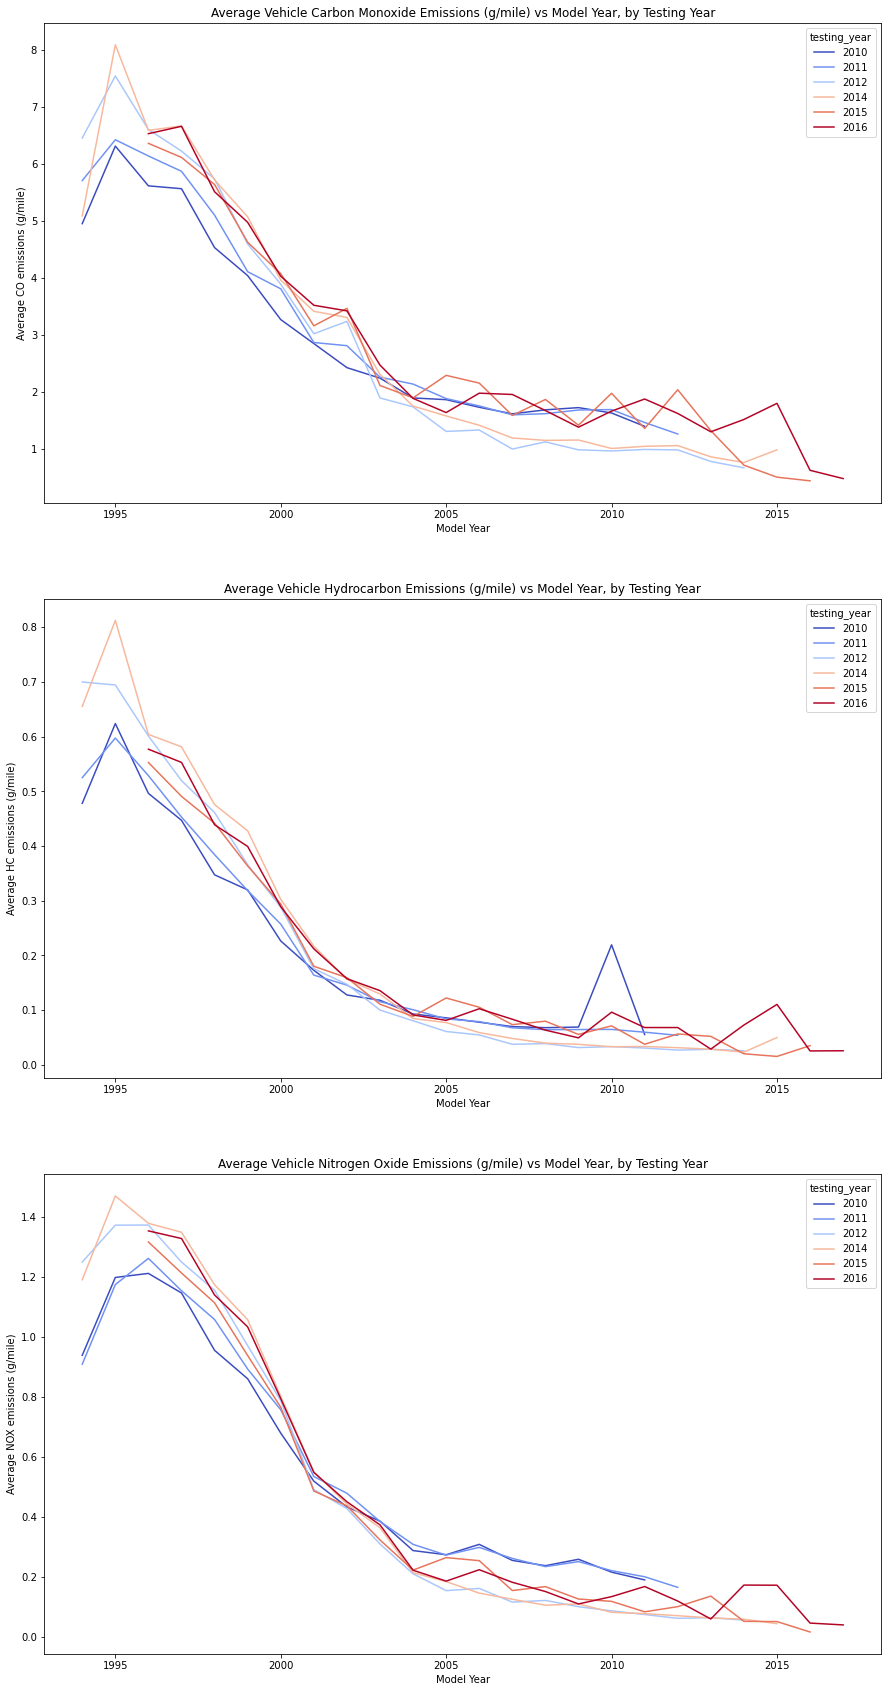

In [27]:
fig, ax = plt.subplots(3,1,figsize=(15, 30), facecolor="white")
sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_CO_mean', hue="testing_year", palette="coolwarm",ax=ax[0])
ax[0].set_xlabel("Model Year")
ax[0].set_ylabel("Average CO emissions (g/mile)")
ax[0].set_title("Average Vehicle Carbon Monoxide Emissions (g/mile) vs Model Year, by Testing Year")
# plt.savefig('V_VEH_YEAR_vs_CO_mean.png')

sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_HC_mean', hue="testing_year", palette="coolwarm",ax=ax[1])
ax[1].set_xlabel("Model Year")
ax[1].set_ylabel("Average HC emissions (g/mile)")
ax[1].set_title("Average Vehicle Hydrocarbon Emissions (g/mile) vs Model Year, by Testing Year")
# ax[1].savefig('V_VEH_YEAR_vs_HC_mean.png')

sns.lineplot(data=model_year_pollution_dfs_merged, x='V_VEH_YEAR', y='V_NOX_mean', hue="testing_year", palette="coolwarm",ax=ax[2])
ax[2].set_xlabel("Model Year")
ax[2].set_ylabel("Average NOX emissions (g/mile)")
ax[2].set_title("Average Vehicle Nitrogen Oxide Emissions (g/mile) vs Model Year, by Testing Year")
plt.savefig('Model_Year_vs_avg_Pollution.png')


Two general trends appeared evident from the above three plots.

Firstly, emissions rates in newer model years dropped significantly compared to older model years. Newer emissions rates were more than 90% lower than the oldest averages in this dataset. This appears to confirm the EPA's claims that emissions testing and more stringent standards have led to decreases in overall vehicle emissions.

Second, up to model year 2003-2004 it appears that emissions rates in vehicles steadily increased year over year. this could indicate that as a vehicle ages it's pollution control devices become less efficient. This possibility is explored more below. This trends appears to break after model year 2003 or 2004. This may be because newer model years do not require emissions testing for 7 years, so the data could be incomplete or represent a different subset of data than for model years where testing is compulsory.

## Analysis Part II: Pollution Analysis

In addition to understanding trends with regard to emissions test passing rates, the team wanted to better understand the tangible benefits of emissions testing. To do this, we focused on looking at the potential impact of testing on overall vehicle pollution.

I approached this in two ways. First, I created a visual comparison between the average emissions of vehicles on their first and last emissions tests in a given testing year. I wanted to see if there was any difference between values before and after potential intervention to fix vehicles. Secondly, I created an average pollution per year metric to estimate/quantify the amount of pollution avoided due to testing.

Seeing benefits in the two above areas could lead to a more compelling case to continue emissions testing in PA, so that vehicle performance and air quality would improve statewide.

### ----Pollution Control Degradation----

The first pollution-related analysis the team conducted was to compare emissions results after a vehicle's first and last IM240 test in a given year.

If a vehicle failed it's IM240 test, in theory it would need to get repaired and re-take the test until it's emissions values reached acceptable levels. As such, the team wanted to compare emissions pre-repair and post-repair to see whether there was a noticable difference.

First I loaded in the data from Part I.

In [31]:
pollution_degradation_df=pd.read_csv("./Pollution_Degradation.csv")

#display first 5 rows to show data structure
pollution_degradation_df.head()

,V_VEH_YEAR,V_HC_first,V_HC_last,V_HC_diff,V_NOX_first,V_NOX_last,V_NOX_diff,V_CO_first,V_CO_last,V_CO_diff,testing_year
0,1995,1.028063,0.697158,0.330905,1.823751,1.500109,0.323642,10.416887,7.858637,2.558250,2016
1,1996,0.581134,0.409865,0.171269,1.341856,1.120653,0.221203,6.605968,5.172050,1.433918,2016
2,1997,0.558582,0.389551,0.169031,1.318695,1.097444,0.221250,6.712421,5.252400,1.460022,2016
3,1998,0.446639,0.307075,0.139564,1.143860,0.920586,0.223275,5.570534,4.388494,1.182040,2016
4,1999,0.410547,0.263880,0.146667,1.039107,0.773096,0.266012,5.095998,3.866872,1.229126,2016


Next, I plotted the average emissions values for each model year.

For each pollutant I created two plots. One showing the average emissions after the vehicle's first IM240 test (left below), and one showing the average emissions after the vehicle's last IM240 test (right).

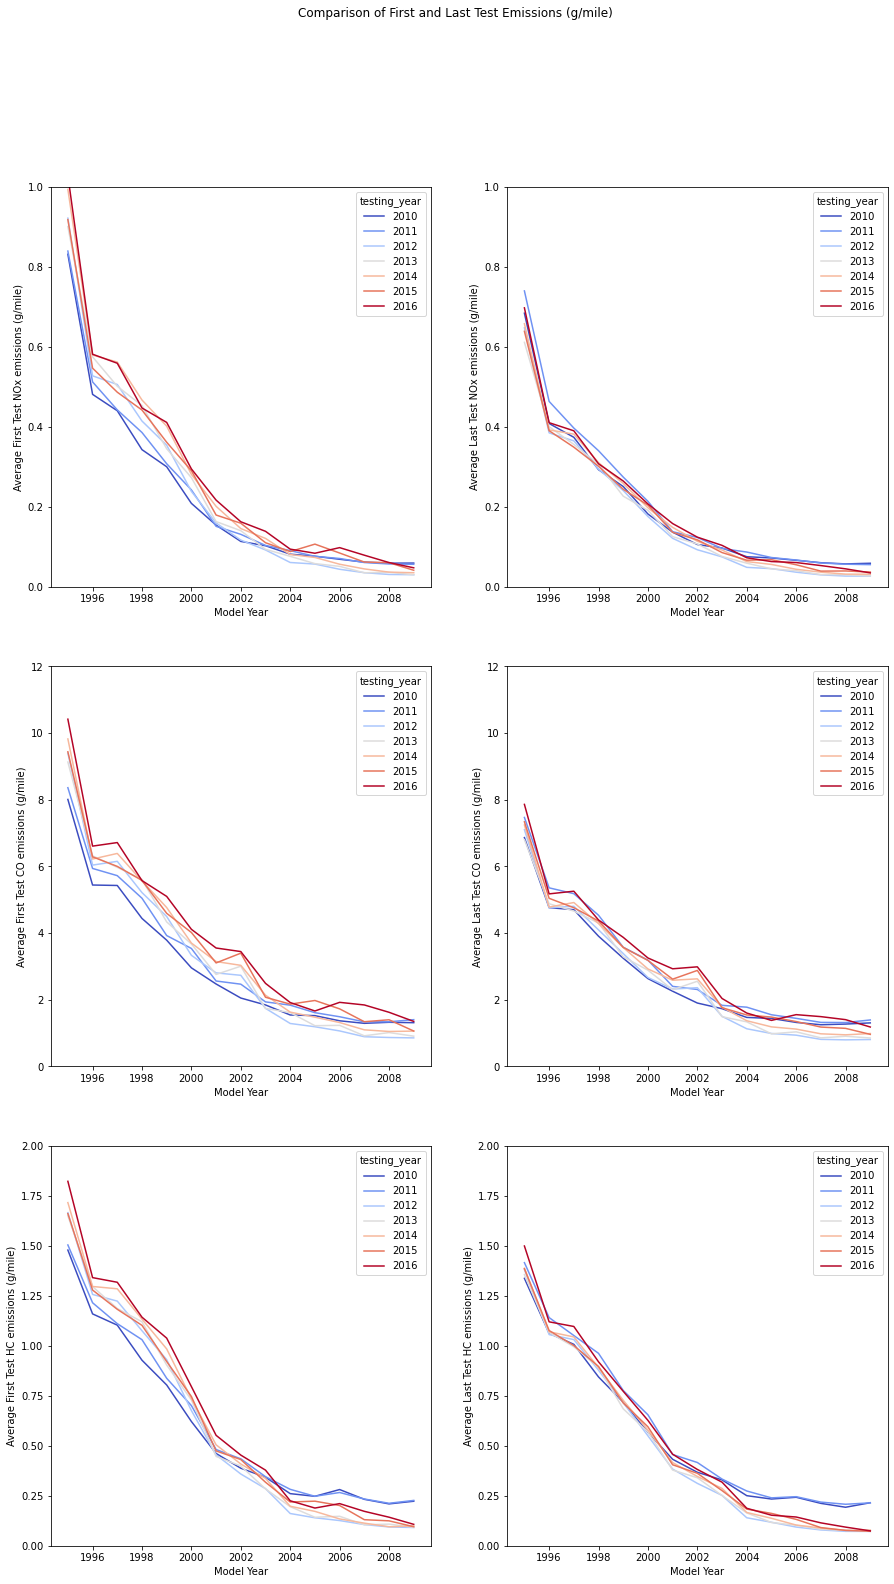

In [38]:
fig, ax = plt.subplots(3,2,figsize=(15, 25), facecolor="white")
fig.suptitle('Comparison of First and Last Test Emissions (g/mile)')

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_first', hue="testing_year", palette="coolwarm",ax=ax[0][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_last', hue="testing_year", palette="coolwarm",ax=ax[0][1])
ax[0][0].set_ylim(0,1)
ax[0][1].set_ylim(0,1)
ax[0][0].set_xlabel("Model Year")
ax[0][0].set_ylabel("Average First Test NOx emissions (g/mile)")
ax[0][1].set_xlabel("Model Year")
ax[0][1].set_ylabel("Average Last Test NOx emissions (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_first', hue="testing_year", palette="coolwarm",ax=ax[1][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_last', hue="testing_year", palette="coolwarm",ax=ax[1][1])
ax[1][0].set_ylim(0,12)
ax[1][1].set_ylim(0,12)
ax[1][0].set_xlabel("Model Year")
ax[1][0].set_ylabel("Average First Test CO emissions (g/mile)")
ax[1][1].set_xlabel("Model Year")
ax[1][1].set_ylabel("Average Last Test CO emissions (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_first', hue="testing_year", palette="coolwarm",ax=ax[2][0])
sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_last', hue="testing_year", palette="coolwarm",ax=ax[2][1])
ax[2][0].set_ylim(0,2)
ax[2][1].set_ylim(0,2)
ax[2][0].set_xlabel("Model Year")
ax[2][0].set_ylabel("Average First Test HC emissions (g/mile)")
ax[2][1].set_xlabel("Model Year")
ax[2][1].set_ylabel("Average Last Test HC emissions (g/mile)")

plt.savefig('First_and_Last_Test_Comparisons.png')



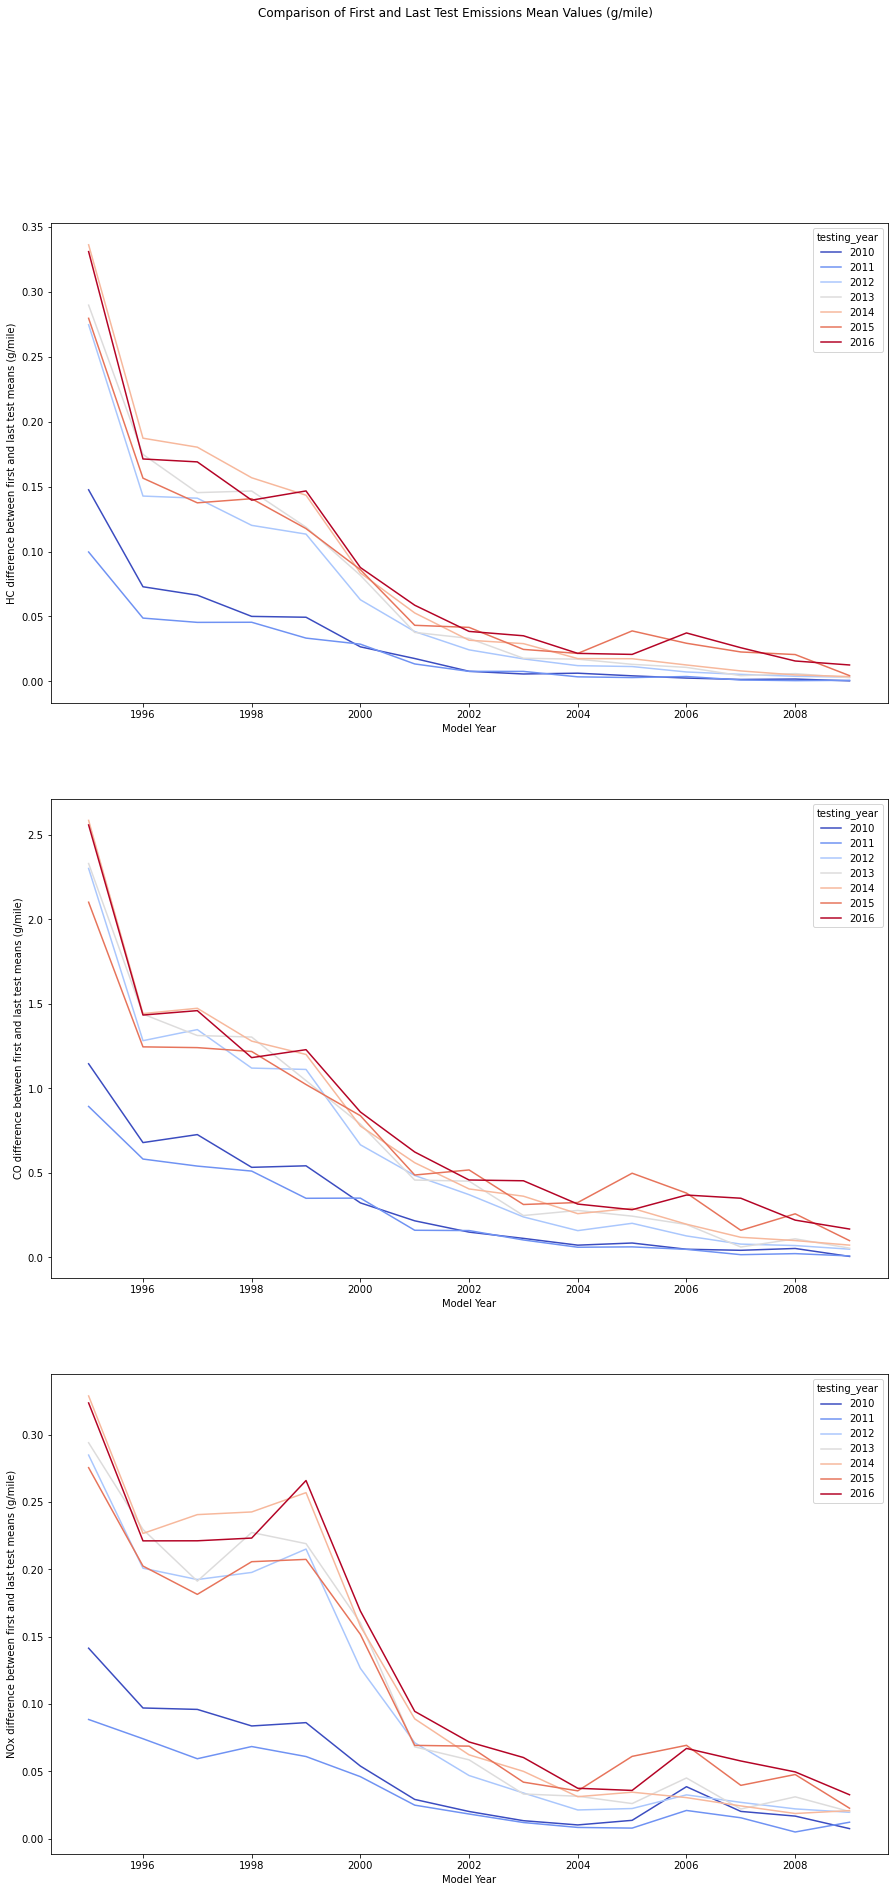

In [41]:
fig, ax = plt.subplots(3,1,figsize=(15, 30), facecolor="white")
fig.suptitle('Comparison of First and Last Test Emissions Mean Values (g/mile)')

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_HC_diff', hue="testing_year", palette="coolwarm",ax=ax[0])
ax[0].set_xlabel("Model Year")
ax[0].set_ylabel("HC difference between first and last test means (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_CO_diff', hue="testing_year", palette="coolwarm",ax=ax[1])
ax[1].set_xlabel("Model Year")
ax[1].set_ylabel("CO difference between first and last test means (g/mile)")

sns.lineplot(data=pollution_degradation_df, x='V_VEH_YEAR', y='V_NOX_diff', hue="testing_year", palette="coolwarm",ax=ax[2])
ax[2].set_xlabel("Model Year")
ax[2].set_ylabel("NOx difference between first and last test means (g/mile)")

plt.savefig('Difference_Bewteen_first_and_last_test_means.png')

### ----Pollutants Saved----

In [ ]:
theoretical_pollutants_saved_df_2010 = pd.read_csv("./theoretical_pollutants_saved_df_2010.csv")
theoretical_pollutants_saved_df_2011 = pd.read_csv("./theoretical_pollutants_saved_df_2011.csv")
theoretical_pollutants_saved_df_2012 = pd.read_csv("./theoretical_pollutants_saved_df_2012.csv")
theoretical_pollutants_saved_df_2013 = pd.read_csv("./theoretical_pollutants_saved_df_2013.csv")
theoretical_pollutants_saved_df_2014 = pd.read_csv("./theoretical_pollutants_saved_df_2014.csv")
theoretical_pollutants_saved_df_2015 = pd.read_csv("./theoretical_pollutants_saved_df_2015.csv")
theoretical_pollutants_saved_df_2016 = pd.read_csv("./theoretical_pollutants_saved_df_2016.csv")

In [ ]:
theoretical_pollutants_dfs=[theoretical_pollutants_saved_df_2010,theoretical_pollutants_saved_df_2011,theoretical_pollutants_saved_df_2012,theoretical_pollutants_saved_df_2013,theoretical_pollutants_saved_df_2014,theoretical_pollutants_saved_df_2015,theoretical_pollutants_saved_df_2016]
theoretical_pollutants_dfs_merged=pd.concat(theoretical_pollutants_dfs)
theoretical_pollutants_dfs

|Testing Year	|Theoretical HC Saved (tonnes)|	Theoretical CO Saved (tonnes)|	Theoretical NOX Saved (tonnes)|
|---|---|---|---|	
|2010|	360|	3970|	350|
|2011|	291|	3674|	278|
|2012|	609|	6816|	666|
|2013|	569|	6316|	663|
|2014|	538|	5799|	625|
|2015|	424|	4734|	451|
|2016|	399|	4465|	466|


## Future Work
- OBD and IM240 confusion/impact
- paired t test for mean difference first/last test
- mini vin analysis